<a href="https://colab.research.google.com/github/MostafaSalmanian/new/blob/main/Identifying_dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

In [2]:
Path = "content/image"
Pet_dir = untar_data(URLs.PETS, Path)
Pet_image = Pet_dir / "images"

In [3]:
cat = lambda cat: cat[0].isupper()

data_loaders =ImageDataLoaders.from_name_func(
    path=Pet_image,
    fnames=get_image_files(Pet_image),
    label_func=cat,
    item_tfms = Resize(224),
    valid_pct=0.2,
    bs=64
)

In [4]:
neural_network = cnn_learner(
    data_loaders,
    resnet34,
    metrics=error_rate
)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

In [5]:
neural_network.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.160275,0.023423,0.009472,32:08


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.048754,0.013358,0.004060,46:59


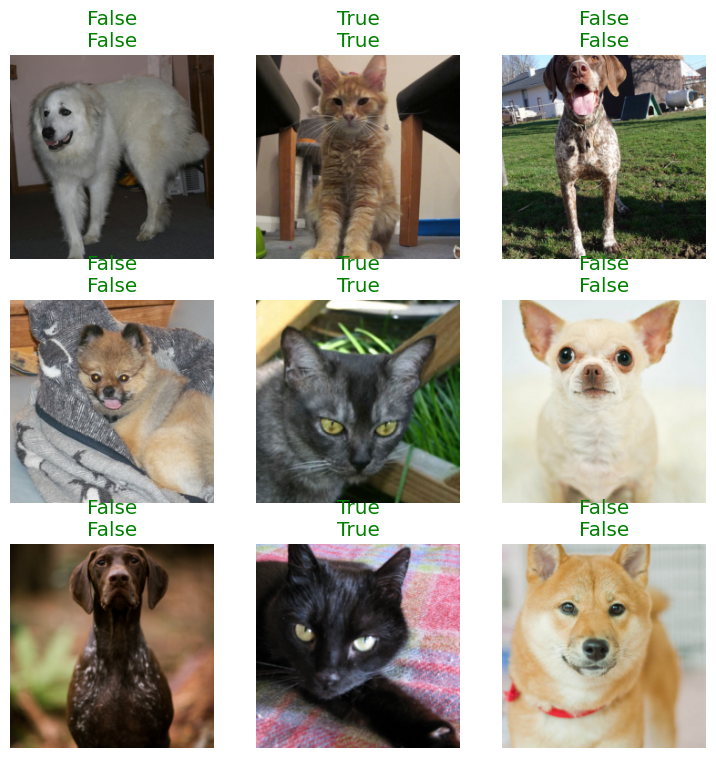

In [8]:
neural_network.show_results()